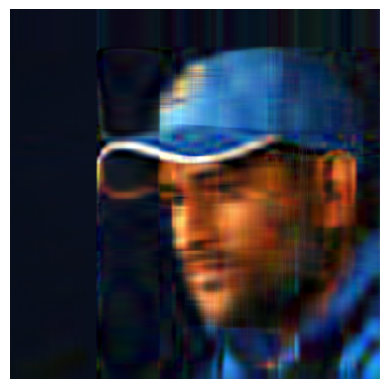

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("dhoni.jpg").convert("RGB")
a_np = np.array(image)


a_r = a_np[:, :, 0]
a_g = a_np[:, :, 1]
a_b = a_np[:, :, 2]

def comp_2d(image_2d):

    mean_centered = image_2d - np.mean(image_2d, axis=0)

    cov_matrix = np.cov(mean_centered, rowvar=False)
    eig_val, eig_vec = np.linalg.eigh(cov_matrix)

    idx = np.argsort(eig_val)[::-1]
    eig_vec = eig_vec[:, idx]

    numpc = 10  # Adjust the number of principal components here
    eig_vec = eig_vec[:, :numpc]

    score = np.dot(mean_centered, eig_vec)

    recon = np.dot(score, eig_vec.T) + np.mean(image_2d, axis=0)
    recon_img_mat = np.uint8(np.clip(recon, 0, 255))
    return recon_img_mat


a_r_recon = comp_2d(a_r)
a_g_recon = comp_2d(a_g)
a_b_recon = comp_2d(a_b)


recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
recon_color_img = Image.fromarray(recon_color_img)


plt.imshow(recon_color_img)
plt.axis("off")
plt.show()
